In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(tf.__version__)

2.4.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

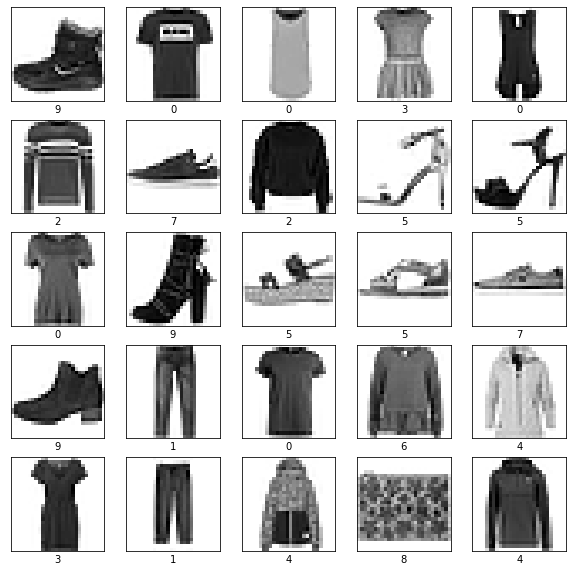

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [6]:
train_images = train_images.reshape(*train_images.shape, 1)
test_images = test_images.reshape(*test_images.shape, 1)


model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu'),
    keras.layers.BatchNormalization(), 
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(), 
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='nadam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 106s 55ms/step - loss: 0.6870 - accuracy: 0.7579

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nТочность на проверочных данных:', test_acc)

In [ ]:
soft_prediction = model.predict(test_images)
cf = confusion_matrix(test_labels, [np.argmax(el) for el in soft_prediction])

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


display = ConfusionMatrixDisplay(cf, display_labels = labels)
fig = plt.figure(figsize=(16, 9))
display.plot(ax=fig.add_subplot(111), values_format="d")
plt.show()

In [ ]:
soft_prediction = model.predict(test_images)

most_likeable = [[0 for _ in range(10)] for _ in range(10)]
most_likeable_prob = [[0.0 for _ in range(10)] for _ in range(10)]

for index in range(len(soft_prediction)):
    for class_index in range(10):
        class_prob = soft_prediction[index][class_index]
        class_prob *= 10 ** 10
        label = test_labels[index]
        if class_prob - most_likeable_prob[label][class_index] > 10 ** -8:
            most_likeable_prob[label][class_index] = class_prob
            assert(0 <= label and label < 10 and 0 <= class_index and class_index < 10)
            assert(most_likeable_prob[label][class_index] > 0)
            most_likeable[label][class_index] = index
    
            
plt.figure(figsize=(12,12))
tmp = 0
for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, tmp + 1)
        tmp += 1
        if (j == 0):
            plt.ylabel(labels[i])
        if (i == 9):
            plt.xlabel(labels[j])
        plt.imshow(test_images[most_likeable[i][j]][:, :, 0], cmap=plt.cm.binary)
plt.show()